<h1 style="text-align:center">Oil Well Upstream Report</h1>

<div class="div_style" id="sec0">
    <h3>-> Style Sheet</h3>
</div>

In [31]:
%%html
<style>
    .div_style{
        background-color:beige;
        padding:15px 10px;
    }
    .div_style h3{
        display: inline-grid;
    }
    #contents{
        background-color:beige;
        padding:15px 10px;
    }
    #contents a{
        text-decoration: none;
        color:grey;
    }
    #contents a:hover{
        text-decoration: none;
        color:orange;
    }
    .right_a{
        float:right;
        text-decoration: none;
        color:grey;
    }
    .right_a:hover{
        text-decoration: none;
        color:orange;
    }
</style>

<div id="contents">
    <h3>-> Contents</h3>
    <ul>
        <li><a href="#sec1">Libraries</a></li>
        <li><a href="#sec2">Import</a></li>
        <li><a href="#sec3">Data Info</a></li>
        <li><a href="#sec4">Preprocessing</a></li>
        <li><a href="#sec5">Data Visualization</a></li>
        <li><a href="#sec6">Domain Overview</a></li>
    </ul>
</div>

<div class="div_style" id="sec1">
    <h3>-> Libraries</h3>
    <a href="#contents" class="right_a">Contents ^</a>
</div>

In [32]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



/kaggle/input/oil-well/Oil well.xlsx


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<div class="div_style" id="sec2">
    <h3>-> Import</h3>
    <a href="#contents" class="right_a">Contents ^</a>
</div>

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
data = pd.read_excel('/content/drive/MyDrive/data_set/Oil well.xlsx')

In [37]:
data.head()

,Oil well operation parameters (2013 - 2021 y). Well № 807,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,\nOil volume (m3/day),Volume of liquid (m3/day),\nGas volume (m3/day),Water volume (m3/day),Water cut (%),\nWorking hours,\nDynamic level (m),\nReservoir pressure (atm)
2,2013-01-01 00:00:00,49,70,13055,21,29,24,1819,214
3,2013-01-02 00:00:00,49,70,13055,21,29,24,1836,214
4,2013-01-03 00:00:00,49,70,13055,21,29,24,1788,214


In [38]:
data.rename(columns=data.iloc[1].str.replace('\n', ''), inplace=True)

In [39]:
data.drop(index=[0,1], inplace=True)

In [40]:
data = data.reset_index().drop(columns=["index"])

In [41]:
data.sample(frac=1).head()

,Date,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm)
2832,2020-10-04 00:00:00,9,33,2308,24,73,19,2122,104
2241,2019-02-21 00:00:00,13,57,3567,43,76,22,2110,127
488,2014-05-04 00:00:00,30,87,7998,57,65,24,1854,195
1358,2016-09-21 00:00:00,13,57,3587,44,76,24,1967,161
2596,2020-02-11 00:00:00,9,38,2367,29,76,17,2134,113


<div class="div_style" id="sec3">
    <h3>-> Data Info</h3>
    <a href="#contents" class="right_a">Contents ^</a>
</div>

In [42]:
data.describe()

,Date,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm)
count,2939,2939,2939,2939,2939,2939,2939,2939,2939
unique,2939,50,88,1148,72,58,18,275,115
top,2013-01-01 00:00:00,14,57,3684,43,75,24,2122,157
freq,1,287,205,33,169,325,2002,231,26


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       2939 non-null   object
 1   Oil volume (m3/day)        2939 non-null   object
 2   Volume of liquid (m3/day)  2939 non-null   object
 3   Gas volume (m3/day)        2939 non-null   object
 4   Water volume (m3/day)      2939 non-null   object
 5   Water cut (%)              2939 non-null   object
 6   Working hours              2939 non-null   object
 7   Dynamic level (m)          2939 non-null   object
 8   Reservoir pressure (atm)   2939 non-null   object
dtypes: object(9)
memory usage: 206.8+ KB


<div class="div_style" id="sec4">
    <h3>-> Preprocessing</h3>
    <a href="#contents" class="right_a">Contents ^</a>
</div>

In [44]:
data["new_date"] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [45]:
schema = {
    "Oil volume (m3/day)" : int,
    "Volume of liquid (m3/day)" : int,
    "Gas volume (m3/day)" : int,
    "Water volume (m3/day)" : int,
    "Working hours" : int,
    "Dynamic level (m)" : int,
    "Reservoir pressure (atm)" : int,
    "Water cut (%) " : int
}

In [46]:
data = data.astype(schema)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       2939 non-null   object        
 1   Oil volume (m3/day)        2939 non-null   int64         
 2   Volume of liquid (m3/day)  2939 non-null   int64         
 3   Gas volume (m3/day)        2939 non-null   int64         
 4   Water volume (m3/day)      2939 non-null   int64         
 5   Water cut (%)              2939 non-null   int64         
 6   Working hours              2939 non-null   int64         
 7   Dynamic level (m)          2939 non-null   int64         
 8   Reservoir pressure (atm)   2939 non-null   int64         
 9   new_date                   2939 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 229.7+ KB


In [48]:
data.describe()

,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm),new_date
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939
mean,17.624362,59.464103,4730.146308,41.828853,70.694794,22.344675,1930.383464,157.019054,2017-01-09 16:48:49.976182272
min,0.000000,12.000000,4.000000,9.000000,29.000000,7.000000,1529.000000,100.000000,2013-01-01 00:00:00
25%,11.000000,50.000000,3041.500000,33.000000,69.000000,22.000000,1855.000000,129.000000,2015-01-05 12:00:00
50%,15.000000,58.000000,3909.000000,43.000000,73.000000,24.000000,1890.000000,157.000000,2017-01-10 00:00:00
75%,22.000000,74.000000,5843.500000,50.000000,76.000000,24.000000,2008.000000,185.500000,2019-01-14 12:00:00
max,49.000000,113.000000,13113.000000,99.000000,100.000000,24.000000,2137.000000,214.000000,2021-01-18 00:00:00
std,9.689026,18.634101,2598.888524,13.056625,9.534203,3.039553,114.543752,32.917150,NaN


<div class="div_style" id="sec5">
    <h3>-> Data Visualization</h3>
    <a href="#contents" class="right_a">Contents ^</a>
</div>

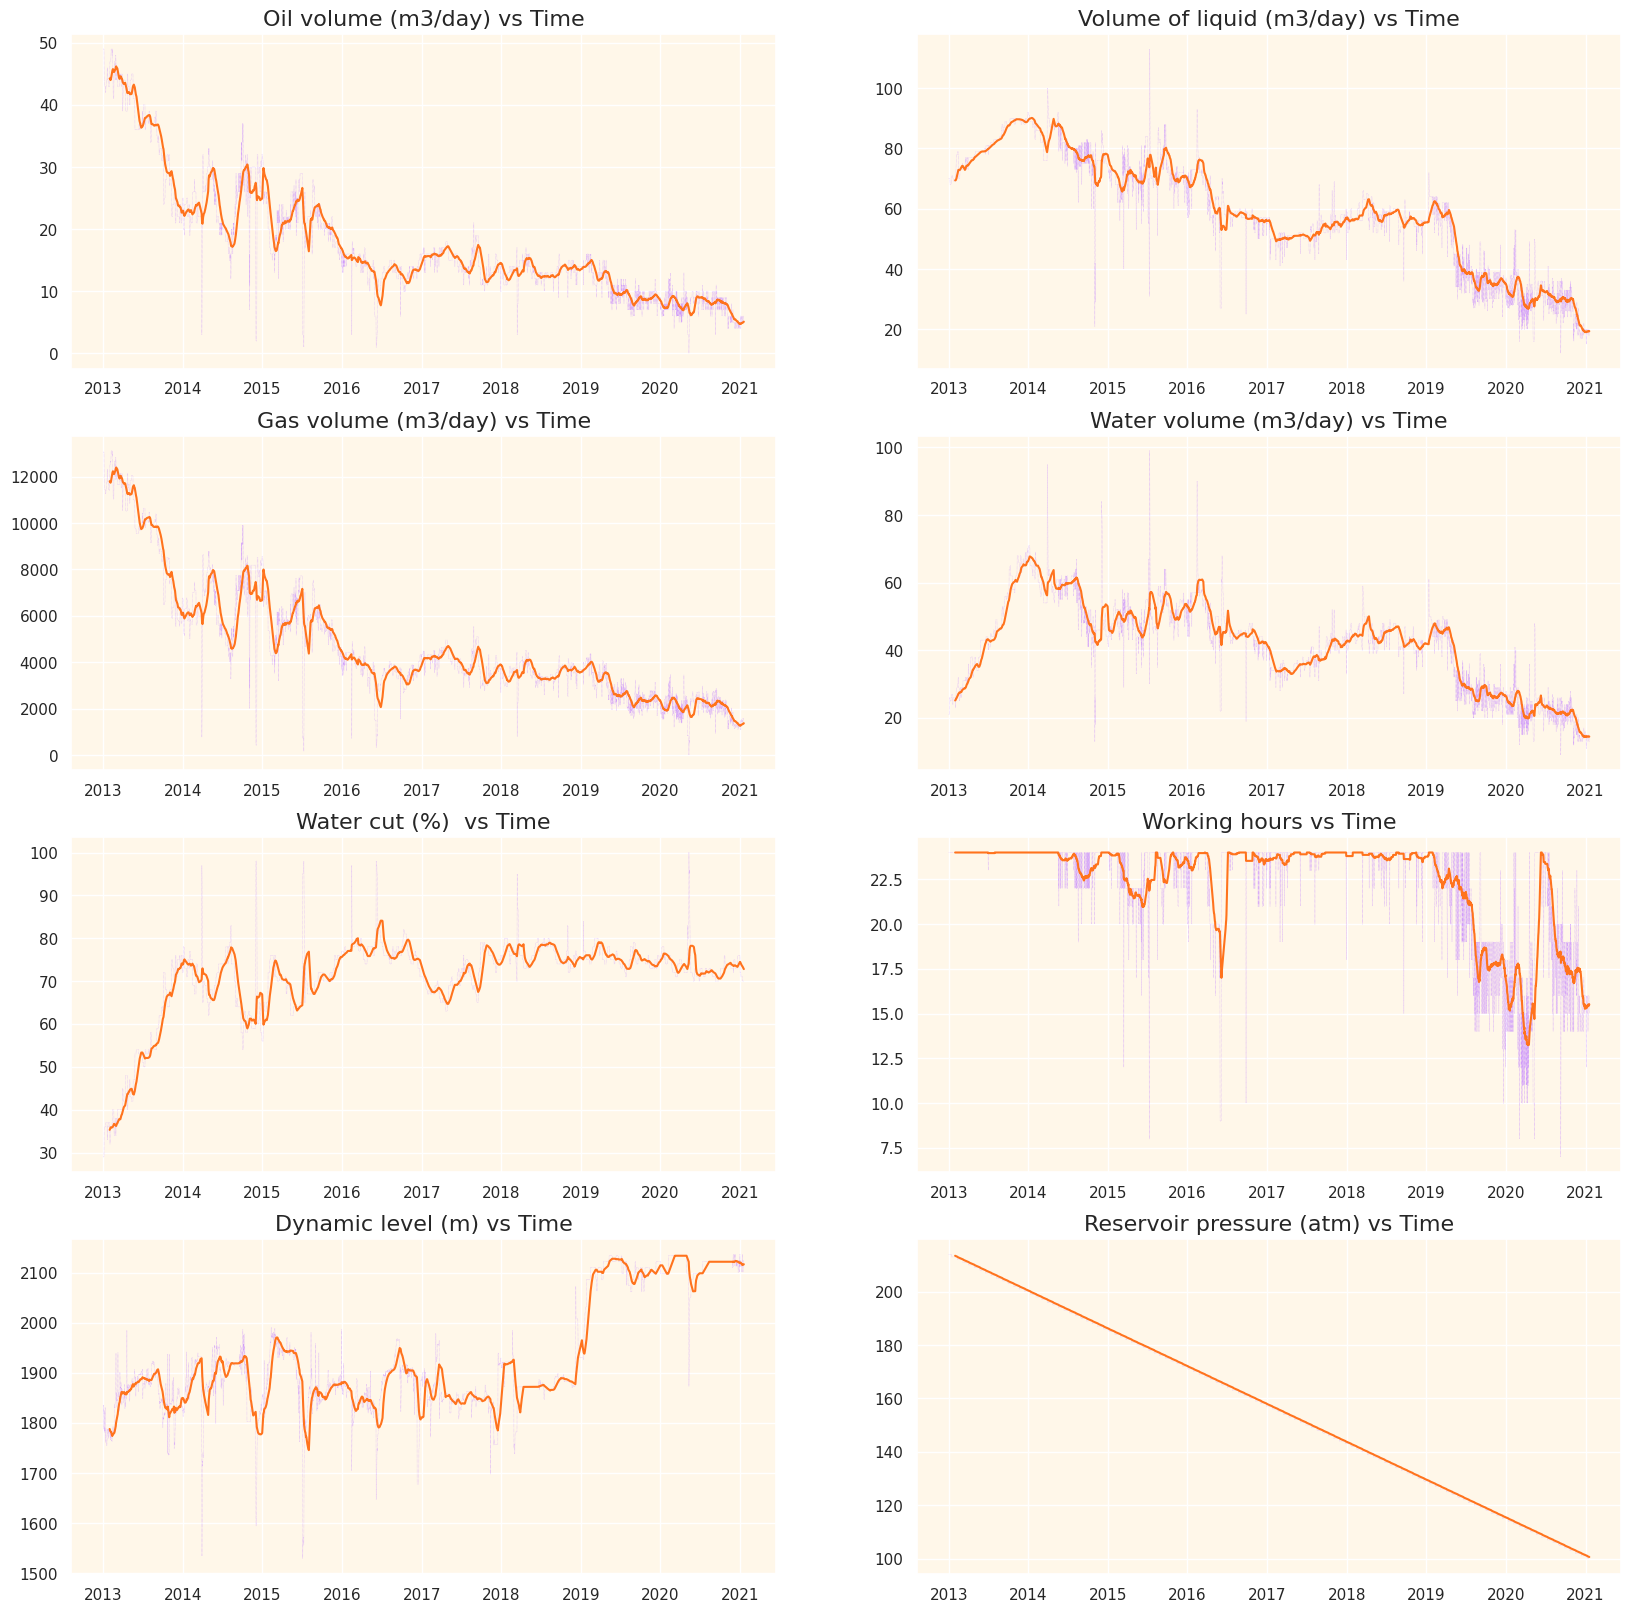

In [49]:
fig = plt.figure(figsize=(20,20))
spec = fig.add_gridspec(4,2)
ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,0])
ax4 = fig.add_subplot(spec[1,1])
ax5 = fig.add_subplot(spec[2,0])
ax6 = fig.add_subplot(spec[2,1])
ax7 = fig.add_subplot(spec[3,0])
ax8 = fig.add_subplot(spec[3,1])

axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

# Adding color preference
bg_color = '#FFF7E9'
for selection in axs:
    selection.set_facecolor(bg_color)

i = 0

for col in data.columns[1:-1]:
    axs[i].plot(data["new_date"],data[col],lw=0.34,linestyle="dotted",c="#D09CFA")
    axs[i].plot(data["new_date"],data[col].rolling(window=30).mean(),c="#FF731D")
    axs[i].set_title(f"{col} vs Time",fontsize=16)
    i+=1

plt.show()

In [50]:
data["Rest Time"] = 24 - data["Working hours"]

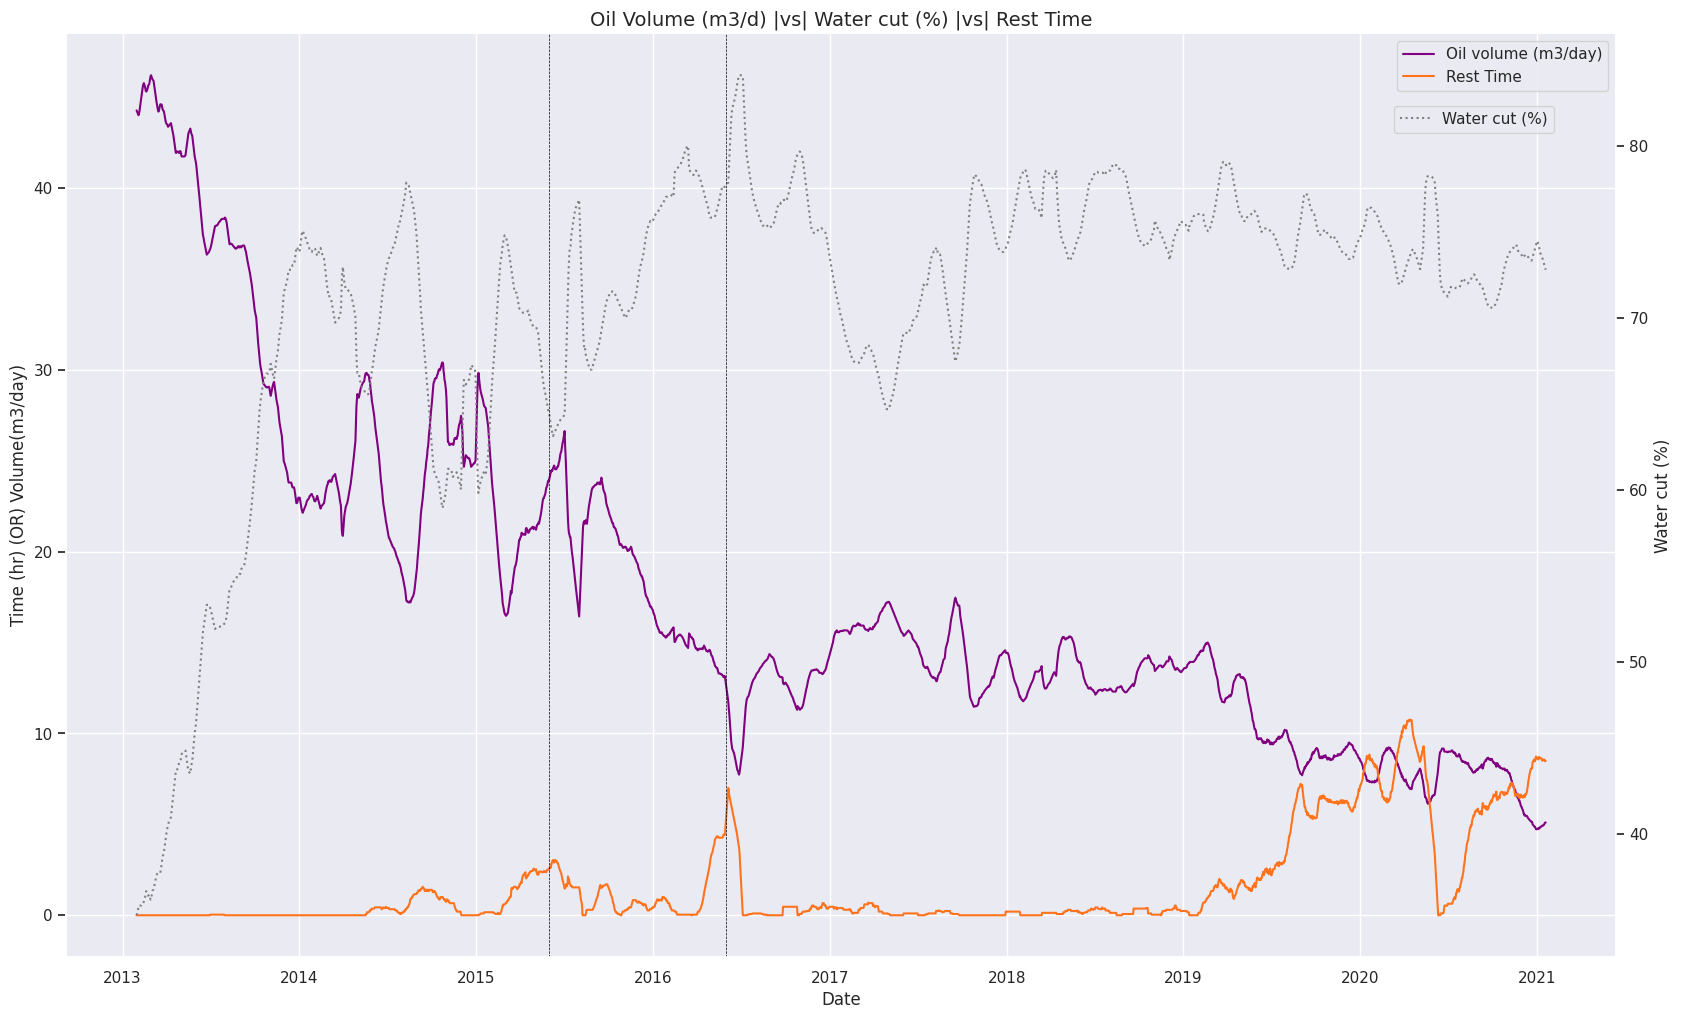

In [51]:
fig = plt.figure(figsize=(20,12))
spec = fig.add_gridspec(1,1)
ax1 = fig.add_subplot(spec[0,0])

# Plotting Oil volume and Rest Time on the primary y-axis
ax1.plot(data["new_date"], data["Oil volume (m3/day)"].rolling(window=30).mean(), c="purple")
ax1.plot(data["new_date"], data["Rest Time"].rolling(window=30).mean(), c="#FF731D")
ax1.set_xlabel('Date')

# Adding legend for the primary y-axis
ax1.legend(["Oil volume (m3/day)", "Rest Time"], bbox_to_anchor=(1,1))

ax1.set_ylabel("Time (hr) (OR) Volume(m3/day)")

# Creating secondary y-axis for Water cut (%)
ax2 = ax1.twinx()
ax2.plot(data["new_date"], data['Water cut (%) '].rolling(window=30).mean(), c="grey",linestyle="dotted")
ax2.set_ylabel('Water cut (%)')

# Adding legend for the secondary y-axis
ax2.legend(["Water cut (%)"], bbox_to_anchor=(0.965,0.93))

ax2.set_title("Oil Volume (m3/d) |vs| Water cut (%) |vs| Rest Time",fontsize="14")

vertical_line_date1 = '2015-06-01'  # Example date for the vertical line
ax2.axvline(pd.to_datetime(vertical_line_date1), color='black', linestyle='--', label='Event',lw=0.5)

vertical_line_date2 = '2016-06-01'  # Example date for the vertical line
ax2.axvline(pd.to_datetime(vertical_line_date2), color='black', linestyle='--', label='Event',lw=0.5)

ax2.patch.set_alpha(0)
ax2.grid(False)

plt.show()

<ul>
    <li>June 2016: Production paused to reduce rising water cut percentage.</li>
    <li>Goal: Allow oil emulsion to settle and separate.</li>
    <li>Result: Water cut percentage remained high despite resting period.</li>
    <li>Solution: Continuous production for 2 days finally reduced water cut percentage.</li>
    <li>Insight: Oil may separate as lumps away from the pipe.</li>
</ul>

In [52]:
new_data = data.copy()
new_data['year'] = new_data['new_date'].dt.year

In [53]:
new_data.head()

,Date,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm),new_date,Rest Time,year
0,2013-01-01 00:00:00,49,70,13055,21,29,24,1819,214,2013-01-01,0,2013
1,2013-01-02 00:00:00,49,70,13055,21,29,24,1836,214,2013-01-02,0,2013
2,2013-01-03 00:00:00,49,70,13055,21,29,24,1788,214,2013-01-03,0,2013
3,2013-01-04 00:00:00,49,70,13055,21,29,24,1789,214,2013-01-04,0,2013
4,2013-01-05 00:00:00,44,70,11768,26,36,24,1825,214,2013-01-05,0,2013


In [54]:
grp1 = new_data.groupby(by="year").agg({"Volume of liquid (m3/day)":"sum",
                                        "Oil volume (m3/day)":"sum",
                                        "Gas volume (m3/day)":"sum",
                                        "Water volume (m3/day)":"sum",
                                        "Water cut (%) ":"mean",
                                        "Working hours":"sum",
                                        "Dynamic level (m)":"mean",
                                        "Reservoir pressure (atm)":"sum"}).reset_index()

grp1

,year,Volume of liquid (m3/day),Oil volume (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm)
0,2013,29658,13371,3585210,16282,52.991781,8759,1851.805479,75534
1,2014,29431,8904,2391491,20512,68.824658,8626,1880.156164,70366
2,2015,26104,7682,2058363,18435,70.068681,8314,1886.362637,65027
3,2016,22311,4880,1314745,17413,77.426230,8381,1865.292350,60202
4,2017,19113,5407,1453369,13693,70.928767,8705,1853.320548,54861
5,2018,20932,4841,1295333,16092,76.367123,8698,1885.254795,49694
6,2019,16179,3839,1034794,12333,75.419178,7413,2096.580822,44528
7,2020,10692,2777,742271,7923,73.497268,6499,2114.644809,39461
8,2021,345,97,26324,252,70.833333,276,2117.000000,1806


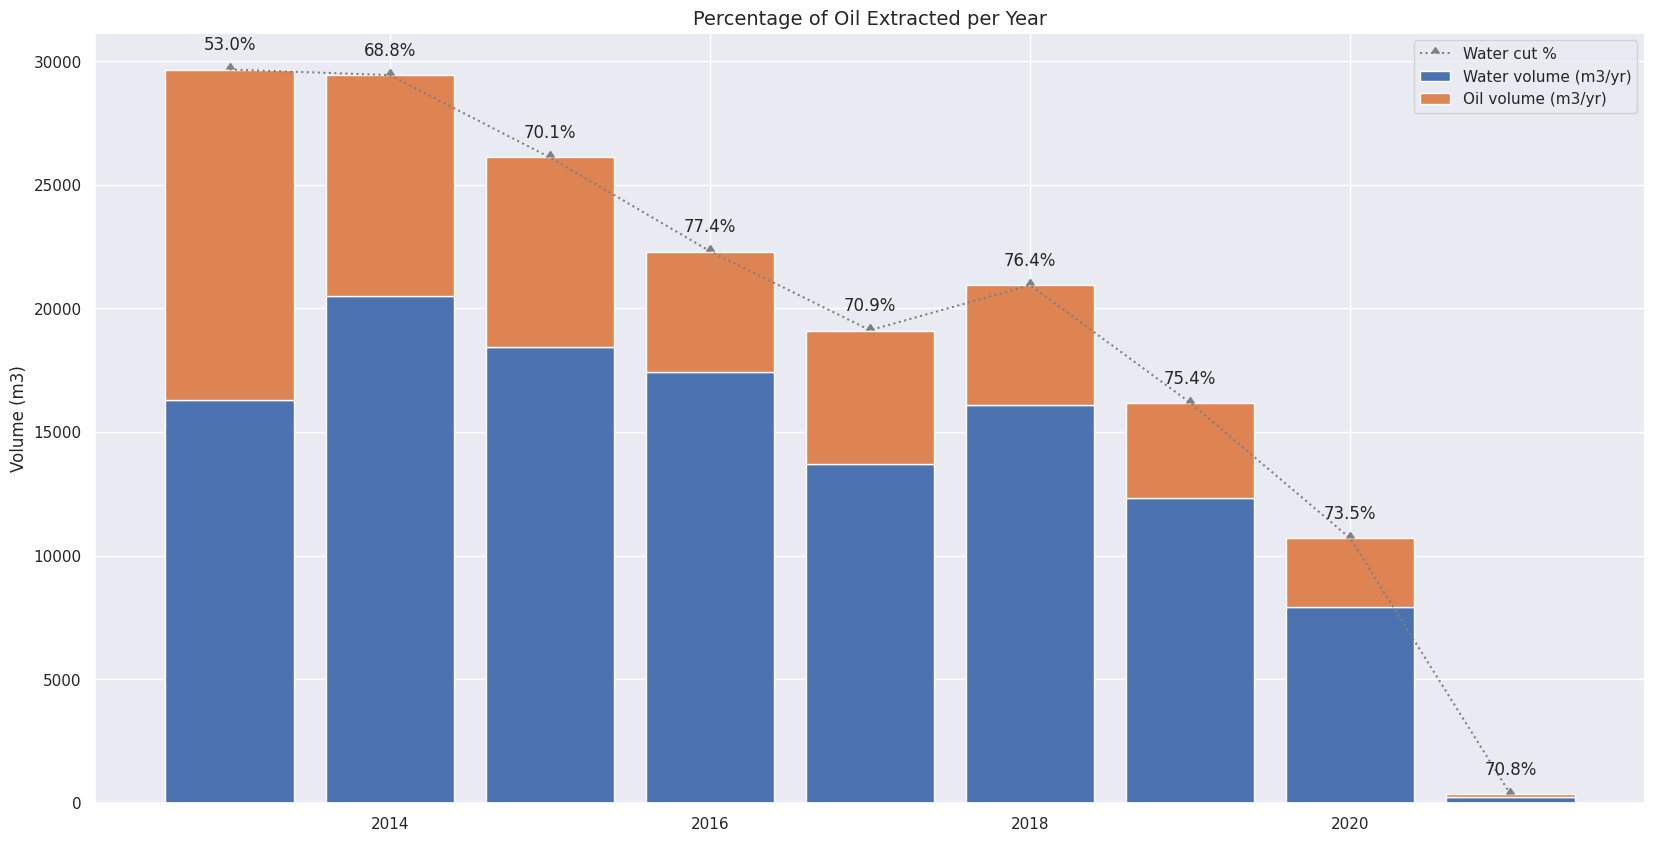

In [55]:
fig = plt.figure(figsize=(20,10))
bottom_val = np.zeros(grp1["year"].unique().shape[0],dtype=int)

for col in ["Water volume (m3/day)","Oil volume (m3/day)"]:
    plt.bar(grp1["year"],
            grp1[col],
            bottom=bottom_val)
    arr1 = grp1[col].to_numpy()
    bottom_val = np.add(bottom_val,arr1)

plt.plot(grp1["year"],
         grp1["Volume of liquid (m3/day)"],
         marker=10,
         c="grey",
         linestyle="dotted")
plt.legend(["Water cut %",
            "Water volume (m3/yr)",
            "Oil volume (m3/yr)"])

for i, year in enumerate(grp1["year"]):
    plt.text(year,
             grp1["Volume of liquid (m3/day)"].iloc[i] + 800,
             f"{grp1['Water cut (%) '].iloc[i].round(1)}%", ha='center')

plt.ylabel("Volume (m3)")

plt.title("Percentage of Oil Extracted per Year",fontsize="14")

plt.show()

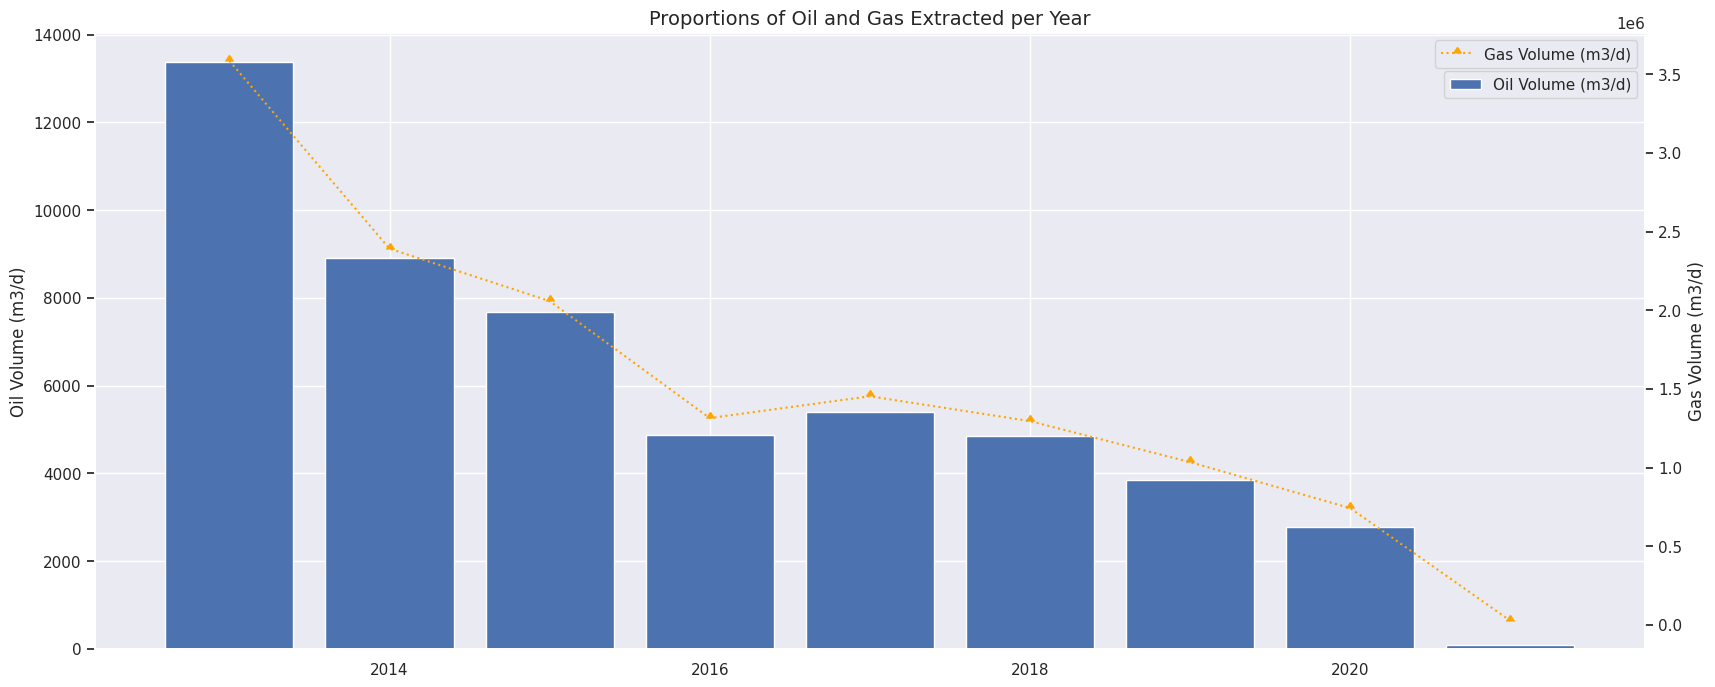

In [56]:
fig = plt.figure(figsize=(20,8))
spec = fig.add_gridspec(1,1)
ax1 = fig.add_subplot(spec[0,0])

ax1.bar(grp1["year"],
        grp1["Oil volume (m3/day)"])
ax1.set_ylabel("Oil Volume (m3/d)")
ax1.legend(["Oil Volume (m3/d)"], bbox_to_anchor=(1, 0.95))

ax2 = ax1.twinx()

ax2.plot(grp1["year"],
         grp1["Gas volume (m3/day)"],
         marker=10,
         linestyle="dotted",
         c="orange")
ax2.set_ylabel("Gas Volume (m3/d)")
ax2.legend(["Gas Volume (m3/d)"], bbox_to_anchor=(1, 1))

ax2.set_title("Proportions of Oil and Gas Extracted per Year", fontsize="14")

ax2.patch.set_alpha(0)
ax2.grid(False)

plt.show()

<div class="div_style" id="sec6">
    <h3>-> Domain Overview</h3>
    <a href="#contents" class="right_a">Contents ^</a>
</div>

In [57]:
data["Oil volume (barrel/day)"] = data["Oil volume (m3/day)"] * 6.29

In [58]:
data.head()

,Date,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm),new_date,Rest Time,Oil volume (barrel/day)
0,2013-01-01 00:00:00,49,70,13055,21,29,24,1819,214,2013-01-01,0,308.21
1,2013-01-02 00:00:00,49,70,13055,21,29,24,1836,214,2013-01-02,0,308.21
2,2013-01-03 00:00:00,49,70,13055,21,29,24,1788,214,2013-01-03,0,308.21
3,2013-01-04 00:00:00,49,70,13055,21,29,24,1789,214,2013-01-04,0,308.21
4,2013-01-05 00:00:00,44,70,11768,26,36,24,1825,214,2013-01-05,0,276.76


In [59]:
print("Total Extracted Barrels : ",data["Oil volume (barrel/day)"].sum())

Total Extracted Barrels :  325809.42


In [60]:
print("Developed by Aryan Sherigar")

Developed by Aryan Sherigar
